In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from dataset import KITTIDataset
import tqdm
from matplotlib import pyplot as plt
import numpy as np
import time
import utils
from model import SparseConv2d,MyFCN,FCN32s,MySparseFCN
batch_size = 16
test_data = KITTIDataset(num=300,file="val")
test_dataloader = DataLoader(test_data,batch_size=batch_size,shuffle=False)
criterion = torch.nn.L1Loss(reduction='mean')

device = "cuda" if torch.cuda.is_available() else "cpu"

100%|██████████| 19/19 [00:15<00:00,  1.23it/s, Epoch=20]


(21, 19)

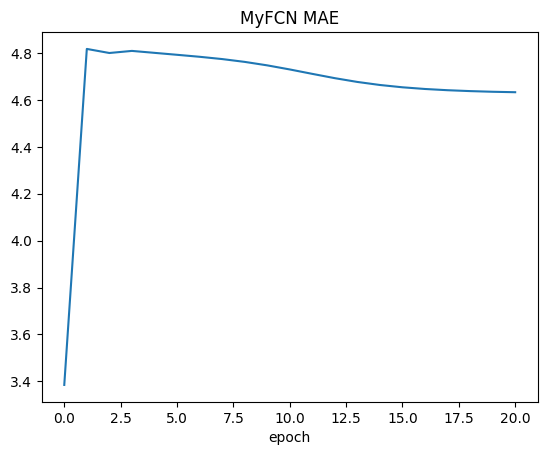

In [2]:
model = MyFCN(in_channel=1,n_class=1)
model.eval()
model.to(device)
num_epochs = 20
loss_epochs = []
with torch.no_grad():
    for i in range(num_epochs+1):
        # print(f"Epoch{i}:")
        epoch = {"Epoch":i}
        losses = []
        bar = tqdm.tqdm(range(len(test_dataloader)),postfix=epoch)
        model.load_state_dict(torch.load(f"model/{model.__class__.__name__}_epoch{i}.pt"))
        for feature,groundtruth in test_dataloader:
            feature = feature.to(device)
            groundtruth = groundtruth.to(device)
            loss = criterion(model(feature),groundtruth)
            losses.append(loss.item())
            bar.update()
        loss_epochs.append(losses.copy())
        bar.close()
test_losses = np.array(loss_epochs)
plt.plot(test_losses.mean(axis=1))
plt.title(f"{model.__class__.__name__} MAE")
plt.xlabel("epoch")
plt.savefig(f"imgs/loss_test_{model.__class__.__name__}_imgs_{len(test_data)}")
np.save(f"model/data/loss_{model.__class__.__name__}_imgs_{len(test_data)}",test_losses)
test_losses.shape

100%|██████████| 19/19 [00:23<00:00,  1.24s/it, Epoch=20]


(21, 19)

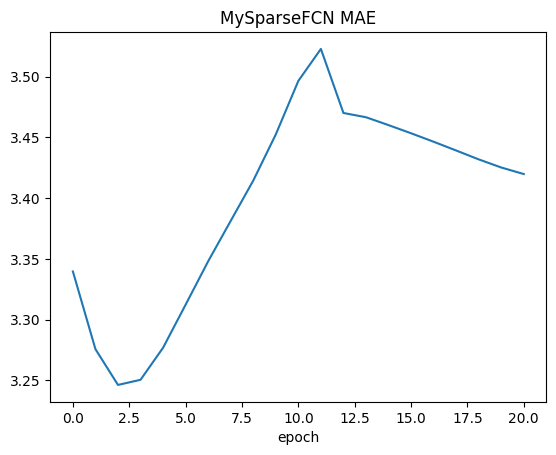

In [3]:
model = MySparseFCN(in_channel=1,n_class=1)
model.eval()
model.to(device)
num_epochs = 20
loss_epochs = []
with torch.no_grad():
    for i in range(num_epochs+1):
        # print(f"Epoch{i}:")
        epoch = {"Epoch":i}
        losses = []
        bar = tqdm.tqdm(range(len(test_dataloader)),postfix=epoch)
        model.load_state_dict(torch.load(f"model/{model.__class__.__name__}_epoch{i}.pt"))
        for feature,groundtruth in test_dataloader:
            feature = feature.to(device)
            groundtruth = groundtruth.to(device)
            loss = criterion(model(feature),groundtruth)
            losses.append(loss.item())
            bar.update()
        loss_epochs.append(losses.copy())
        bar.close()
test_losses = np.array(loss_epochs)
plt.plot(test_losses.mean(axis=1))
plt.title(f"{model.__class__.__name__} MAE")
plt.xlabel("epoch")
plt.savefig(f"imgs/loss_test_{model.__class__.__name__}_imgs_{len(test_data)}")
np.save(f"model/data/loss_{model.__class__.__name__}_imgs_{len(test_data)}",test_losses)
test_losses.shape

KITTI Dataset Property

In [ ]:
test_data = KITTIDataset(num=0,file="val")
index = test_data.index_threshold.copy()
index.pop()
index.insert(0,0)
for i,sync in zip(index,test_data.num_imgs_sync.keys()):
    print(f"Index:{i}\tsync:{sync}\tShape:{test_data[i][0].shape}")
    # print(test_data.current_state)

In [ ]:
utils.plot_imgs(test_data[67])
test_data.num_imgs_sync,len(test_data)